In [2]:
import numpy as np
import pandas as pd
from scipy.spatial.transform import Rotation
import seaborn as sns; sns.set(style='white', context='paper',
                               rc={'font.size': 7, 
                                   'axes.titlesize': 9,
                                   'axes.labelsize': 8,
                                   'xtick.labelsize': 7,
                                   'ytick.labelsize': 7,
                                   'legend.fontsize' : 7,
                                   'legend.markerscale': 0.7,
                                   'axes.spines.top': False,
                                   'axes.spines.right': False,
                                   'axes.linewidth': 0.4,
                                   'xtick.labelbottom': False,
                                   'ytick.labelleft': False,
                                   'figure.constrained_layout.use': True,
                                   'figure.dpi': 200})
from matplotlib import pyplot as plt

---
# Effective dimensionality

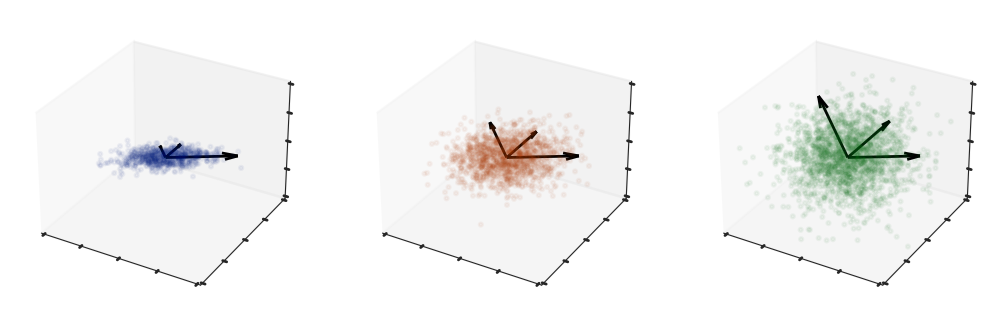

In [8]:
np.random.seed(0)

n_samples_base = 500

eigvecs = Rotation.from_euler('xyz', [0*np.pi/4, .5*np.pi/4, 0*np.pi/4]).apply(np.eye(3))
all_eigvals = np.array([[1, .125, .037],
                        [1, .5, .33], 
                        [1, 1, 1]])

fig = plt.figure(figsize=(5,  4.5 / len(all_eigvals)))

for i, eigvals in enumerate(all_eigvals):
    ax = fig.add_subplot(1, len(all_eigvals), i + 1, projection='3d')
    ax.set(xlim=(-1, 1), ylim=(-1, 1), zlim=(-1, 1))
    ax.grid(False)
    
    n_samples = int((4/3 * np.pi * (eigvals ** .2).prod()) * n_samples_base)
    samples = np.random.multivariate_normal(mean=[0, 0, 0], 
                                            cov=eigvecs @ np.diag(eigvals / 8) @ eigvecs.T, 
                                            size=n_samples)
    ax.scatter(samples[:, 0], samples[:, 1], samples[:, 2], s=2, c=sns.color_palette('dark').as_hex()[i], alpha=0.05)
    
    radii = eigvecs * np.sqrt(eigvals)
    ax.quiver(0, 0, 0, radii[0, 0], radii[1, 0], radii[2, 0], color='black', linewidth=1, arrow_length_ratio=0.2)
    ax.quiver(0, 0, 0, radii[0, 1], radii[1, 1], radii[2, 1], color='black', linewidth=1, arrow_length_ratio=0.2)
    ax.quiver(0, 0, 0, radii[0, 2], radii[1, 2], radii[2, 2], color='black', linewidth=1, arrow_length_ratio=0.2)

plt.savefig('saved/depiction_ED-samples.png', dpi=500)
plt.show()

---
# Methodology

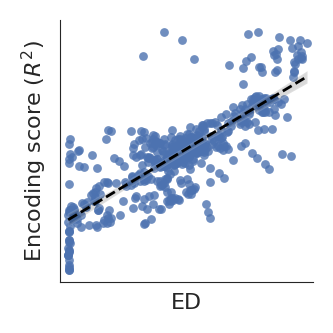

In [12]:
dataset = 'imagenet'
tf_to_pt_layer_map = {'encode_2': 'layer1.0.relu', 'encode_3': 'layer1.1.relu', 
                      'encode_4': 'layer2.0.relu', 'encode_5': 'layer2.1.relu', 
                      'encode_6': 'layer3.0.relu', 'encode_7': 'layer3.1.relu', 
                      'encode_8': 'layer4.0.relu', 'encode_9': 'layer4.1.relu'}
data = pd.merge(pd.read_csv(f'../../results/encoding|benchmark:dicarlo.MajajHong2015.IT.public-pls|pooling:False.csv'),
                pd.read_csv(f'../../results/manifolds|dataset:{dataset}|pooling:True.csv'), 
                on=['architecture', 'task', 'kind', 'source', 'layer'])
data.loc[:, 'layer'] = data['layer'].replace(tf_to_pt_layer_map)

fig, ax = plt.subplots(1, 1, figsize=(1.55, 1.55))

ax.set_xlim(0.9, 30)
sns.regplot(data=data, x='within-concept dimensionality (mean)', y='score', 
            logx=True,
            scatter_kws={'alpha': 0.8, 's': 10, 'linewidth': 0}, 
            line_kws={'color': 'black', 'linestyle': '--', 'linewidth': 1}, 
            ax=ax)
ax.set(xlabel='ED', ylabel=r'Encoding score $(R^2)$', xscale='log')

plt.savefig('saved/depiction_methodology-trend.png', dpi=300)
plt.show()